<a href="https://colab.research.google.com/github/senriquez2/Final-Project/blob/main/PCA_Enriquez.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import seaborn as sns

In [2]:
github_raw_url = 'https://raw.githubusercontent.com/senriquez2/Final-Project/refs/heads/main/Data_Final.csv'
df = pd.read_csv(github_raw_url)


In [3]:
#file_path = 'Data_Final.xlsx'

#df = pd.read_excel(file_path)

# Verify it loaded
#print(df.head())

In [4]:
numeric_columns = ['Alpha A30P_day_1_1', ' Alpha A30P_day_1_2', ' Alpha A30P_day_10_1', ' Alpha A30P_day_10_2', ' Alpha A53T_day_1_1', ' Alpha A53T_day_1_2', ' Alpha A53T_day_10_1', ' Alpha A53T_day_10_2', ' Alpha A53T_day_30_1', ' Alpha A53T_day_30_2', ' Alpha _day_1_1', ' Alpha _day_1_2', ' Alpha _day_10_1', ' Alpha _day_10_2', ' Alpha _day_30_1', ' Alpha _day_30_2']


In [5]:
df.dropna(inplace = True)
print(df.shape)

(1198, 17)


In [6]:
df

,Alpha A30P_day_1_1,Alpha A30P_day_1_2,Alpha A30P_day_10_1,Alpha A30P_day_10_2,Alpha A53T_day_1_1,Alpha A53T_day_1_2,Alpha A53T_day_10_1,Alpha A53T_day_10_2,Alpha A53T_day_30_1,Alpha A53T_day_30_2,Alpha _day_1_1,Alpha _day_1_2,Alpha _day_10_1,Alpha _day_10_2,Alpha _day_30_1,Alpha _day_30_2,Gene names
2562,0.25471,0.30711,0.30715,0.23733,0.39256,0.35108,0.29726,0.20805,0.34615,0.29832,0.36573,0.31584,0.36166,0.45116,2.36070,0.70953,MRP
2564,0.21541,0.13222,0.35948,0.21537,0.25319,4.20470,0.22631,0.28081,0.22852,0.21875,0.42478,0.19266,0.18711,0.30791,1.19240,0.34448,Ide
2568,0.31303,2.39340,0.20126,0.20914,0.32252,0.49293,0.27139,0.38501,0.55162,0.37979,0.61908,0.56133,0.32940,0.37586,1.99090,0.40932,Cyp313a1
2571,0.26402,0.29106,0.30820,0.25684,0.58562,0.52220,1.60320,0.26494,0.23275,0.22729,0.24655,0.33918,0.61681,0.57154,0.79931,0.27403,AIF
2574,0.37077,0.25583,0.39105,0.37911,0.44442,0.49261,0.39691,0.29300,0.35949,0.36210,0.33773,0.42592,0.42664,0.35360,1.16910,0.39945,Dlic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4422,0.13912,0.14842,0.25392,0.25885,0.24338,0.12224,0.19007,0.25734,0.92163,0.25373,0.13721,0.13292,0.23789,0.22395,0.27647,0.28629,bsf
4423,1.89120,1.64340,0.79226,0.81407,2.16610,1.88570,1.13110,1.05890,1.86960,1.69020,4.18970,4.07530,0.80407,0.80046,0.55616,0.53187,Yp3
4429,0.15986,0.40364,0.22775,0.30822,0.27220,0.51326,0.26215,0.30258,1.06670,0.41313,0.31273,0.23807,0.25671,0.25821,0.19142,0.46072,Usp7
4430,0.38841,0.25414,0.43438,0.44324,0.26978,0.21690,0.37359,0.39567,6.27160,0.35726,0.39948,0.31395,0.58421,0.51791,0.44853,0.47454,Aats-his


In [7]:
if 'Gene names' in df.columns:
    df_numeric = df.set_index('Gene names')
else:
    df_numeric = df

# 2. SAFETY CHECK: Handle Zeros
# np.log2(0) = -Infinity, which breaks graphs.
# We replace 0s with the smallest detected number (Limit of Detection).
df_numeric = df_numeric.replace(0, np.nan)
min_val = df_numeric.min().min()
df_filled = df_numeric.fillna(min_val)

# 3. TRANSFORM
df_log2 = np.log2(df_filled)

print("Log2 Transformation Complete.")
print(df_log2.head())

Log2 Transformation Complete.
            Alpha A30P_day_1_1   Alpha A30P_day_1_2   Alpha A30P_day_10_1  \
Gene names                                                                  
MRP                  -1.973072            -1.703173             -1.702985   
Ide                  -2.214843            -2.918988             -1.476017   
Cyp313a1             -1.675627             1.259062             -2.312868   
AIF                  -1.921281            -1.780612             -1.698061   
Dlic                 -1.431404            -1.966743             -1.354575   

             Alpha A30P_day_10_2   Alpha A53T_day_1_1   Alpha A53T_day_1_2  \
Gene names                                                                   
MRP                    -2.075034            -1.349015            -1.510128   
Ide                    -2.215111            -1.981708             2.072003   
Cyp313a1               -2.257459            -1.632539            -1.020545   
AIF                    -1.961058        

In [8]:


transposed_data = df_log2.T

print("Data Transposed.")
print(transposed_data.head())

Data Transposed.
Gene names                 MRP       Ide  Cyp313a1       AIF      Dlic  \
Alpha A30P_day_1_1   -1.973072 -2.214843 -1.675627 -1.921281 -1.431404   
 Alpha A30P_day_1_2  -1.703173 -2.918988  1.259062 -1.780612 -1.966743   
 Alpha A30P_day_10_1 -1.702985 -1.476017 -2.312868 -1.698061 -1.354575   
 Alpha A30P_day_10_2 -2.075034 -2.215111 -2.257459 -1.961058 -1.399312   
 Alpha A53T_day_1_1  -1.349015 -1.981708 -1.632539 -0.771963 -1.170004   

Gene names                rdgA      ScpX  Aats-ile  betaTub60D    FKBP59  ...  \
Alpha A30P_day_1_1   -3.172409 -0.410179 -1.999308   -2.033629 -1.788464  ...   
 Alpha A30P_day_1_2  -3.597208 -0.123905 -2.216518   -2.690405 -2.196409  ...   
 Alpha A30P_day_10_1 -3.281246  0.419539 -2.800877   -0.932967 -0.895422  ...   
 Alpha A30P_day_10_2 -4.282284  0.648373 -2.682881   -1.562090 -0.955396  ...   
 Alpha A53T_day_1_1  -1.854596 -1.098691 -2.118226   -3.008798 -2.182000  ...   

Gene names              Obp99a       Yp1       ACC 

In [9]:
labels = ['A30P_day_1'] * 2 + ['A30P_day_10'] * 2 + ['A53T_day_1'] * 2 + ['A53T_day_10'] * 2 + ['A53T_day_30'] * 2 + ['WT_day_1'] * 2 + ['WT_day_10'] * 2 + ['WT_day_30'] * 2

In [10]:
# STEP 7: Standardize the data
scaler = StandardScaler()
# Use df_log2 (which is already imputed and log-transformed)
# Transpose it so that samples are rows and genes are columns, suitable for PCA
data_for_scaling = df_log2.T

# Ensure all column names (genes) are strings before scaling
data_for_scaling.columns = data_for_scaling.columns.astype(str)
scaled_data = scaler.fit_transform(data_for_scaling)

In [11]:
pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled_data)

In [12]:
sample_names = ['A30P_day_1_1', ' A30P_day_1_2', ' A30P_day_10_1', ' A30P_day_10_2', ' A53T_day_1_1', ' A53T_day_1_2', ' A53T_day_10_1', ' A53T_day_10_2', ' A53T_day_30_1', ' A53T_day_30_2', ' WT_day_1_1', ' WT_day_1_2', ' WT_day_10_1', ' WT_day_10_2', ' WT_day_30_1', ' WT_day_30_2']

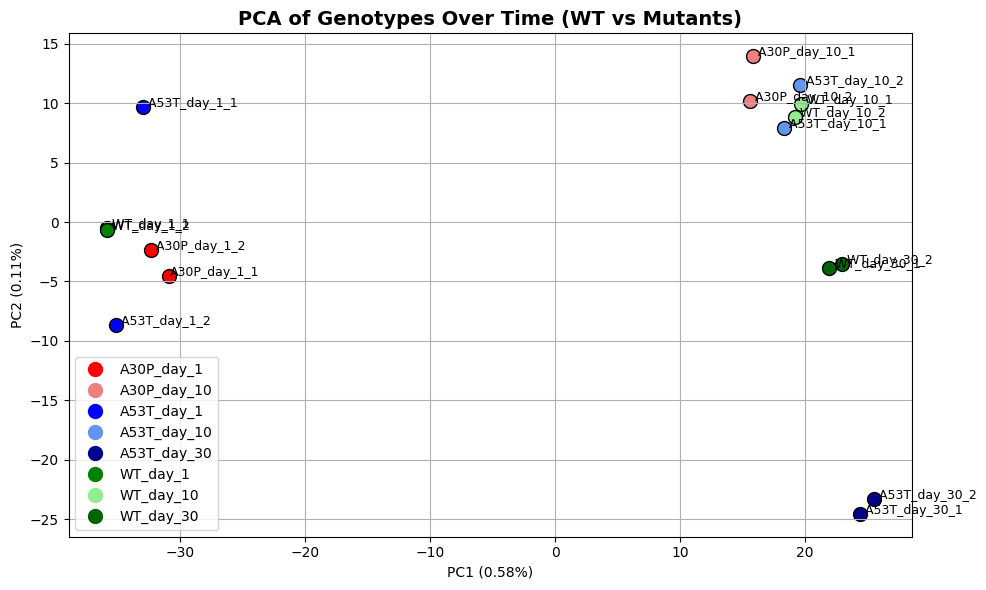

In [13]:
import matplotlib.lines as mlines

# Define color_map for consistent coloring
color_map = {
    'A30P_day_1': 'red',
    'A30P_day_10': 'lightcoral',
    'A53T_day_1': 'blue',
    'A53T_day_10': 'cornflowerblue',
    'A53T_day_30': 'darkblue',
    'WT_day_1': 'green',
    'WT_day_10': 'lightgreen',
    'WT_day_30': 'darkgreen'
}

# Plot PCA
plt.figure(figsize=(10, 6))
for i, label in enumerate(labels):
    plt.scatter(
        pca_result[i, 0],
        pca_result[i, 1],
        color=color_map[label],
        s=100,
        edgecolor='black'
    )
    # Add text label
    plt.text(
        pca_result[i, 0] + 0.1,  # slight x offset
        pca_result[i, 1],
        sample_names[i],
        fontsize=9
    )

# Calculate explained variance ratio
explained_variance = pca.explained_variance_ratio_

# Create custom legend handles
legend_handles = [mlines.Line2D([], [], color=color_map[label], marker='o', linestyle='None', markersize=10, label=label) for label in color_map]

plt.xlabel(f'PC1 ({explained_variance[0]:.2f}%)')
plt.ylabel(f'PC2 ({explained_variance[1]:.2f}%)')
plt.title('PCA of Genotypes Over Time (WT vs Mutants)', fontsize=14, weight='bold')
plt.legend(handles=legend_handles)
plt.grid(True)
plt.tight_layout()
png_path = 'PCA_Metabolites_p den_od_all.png'
pdf_path = 'PCA_Metabolites_p den_od_all.pdf'
plt.savefig(png_path, dpi=600)
plt.savefig(pdf_path)

plt.show()